In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib
%matplotlib inline
#
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

import json
import pickle
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, StratifiedKFold
pd.set_option('max_columns', None)

def save_obj(obj, name):
    with open('./Data/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('./Data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)





In [2]:
data = load_obj('matchdata_19_20')

In [3]:
df = pd.DataFrame(columns=['match_id','game_len','radiant_win','radiant1_hero_id','radiant1_kills','radiant1_deaths','radiant1_assists','radiant1_denies','radiant1_gold','radiant1_lh','radiant1_xp','radiant1_level','radiant1_creeps_stacked','radiant1_camps_stacked','radiant1_rune_pickups','radiant1_firstblood_claimed','radiant1_towers_killed','radiant1_roshans_killed','radiant1_obs_placed','radiant1_sen_placed','radiant2_hero_id','radiant2_kills','radiant2_deaths','radiant2_assists','radiant2_denies','radiant2_gold','radiant2_lh','radiant2_xp','radiant2_level','radiant2_creeps_stacked','radiant2_camps_stacked','radiant2_rune_pickups','radiant2_firstblood_claimed','radiant2_towers_killed','radiant2_roshans_killed','radiant2_obs_placed','radiant2_sen_placed','radiant3_hero_id','radiant3_kills','radiant3_deaths','radiant3_assists','radiant3_denies','radiant3_gold','radiant3_lh','radiant3_xp','radiant3_level','radiant3_creeps_stacked','radiant3_camps_stacked','radiant3_rune_pickups','radiant3_firstblood_claimed','radiant3_towers_killed','radiant3_roshans_killed','radiant3_obs_placed','radiant3_sen_placed','radiant4_hero_id','radiant4_kills','radiant4_deaths','radiant4_assists','radiant4_denies','radiant4_gold','radiant4_lh','radiant4_xp','radiant4_level','radiant4_creeps_stacked','radiant4_camps_stacked','radiant4_rune_pickups','radiant4_firstblood_claimed','radiant4_towers_killed','radiant4_roshans_killed','radiant4_obs_placed','radiant4_sen_placed','radiant5_hero_id','radiant5_kills','radiant5_deaths','radiant5_assists','radiant5_denies','radiant5_gold','radiant5_lh','radiant5_xp','radiant5_level','radiant5_creeps_stacked','radiant5_camps_stacked','radiant5_rune_pickups','radiant5_firstblood_claimed','radiant5_towers_killed','radiant5_roshans_killed','radiant5_obs_placed','radiant5_sen_placed','dire1_hero_id','dire1_kills','dire1_deaths','dire1_assists','dire1_denies','dire1_gold','dire1_lh','dire1_xp','dire1_level','dire1_creeps_stacked','dire1_camps_stacked','dire1_rune_pickups','dire1_firstblood_claimed','dire1_towers_killed','dire1_roshans_killed','dire1_obs_placed','dire1_sen_placed','dire2_hero_id','dire2_kills','dire2_deaths','dire2_assists','dire2_denies','dire2_gold','dire2_lh','dire2_xp','dire2_level','dire2_creeps_stacked','dire2_camps_stacked','dire2_rune_pickups','dire2_firstblood_claimed','dire2_towers_killed','dire2_roshans_killed','dire2_obs_placed','dire2_sen_placed','dire3_hero_id','dire3_kills','dire3_deaths','dire3_assists','dire3_denies','dire3_gold','dire3_lh','dire3_xp','dire3_level','dire3_creeps_stacked','dire3_camps_stacked','dire3_rune_pickups','dire3_firstblood_claimed','dire3_towers_killed','dire3_roshans_killed','dire3_obs_placed','dire3_sen_placed','dire4_hero_id','dire4_kills','dire4_deaths','dire4_assists','dire4_denies','dire4_gold','dire4_lh','dire4_xp','dire4_level','dire4_creeps_stacked','dire4_camps_stacked','dire4_rune_pickups','dire4_firstblood_claimed','dire4_towers_killed','dire4_roshans_killed','dire4_obs_placed','dire4_sen_placed','dire5_hero_id','dire5_kills','dire5_deaths','dire5_assists','dire5_denies','dire5_gold','dire5_lh','dire5_xp','dire5_level','dire5_creeps_stacked','dire5_camps_stacked','dire5_rune_pickups','dire5_firstblood_claimed','dire5_towers_killed','dire5_roshans_killed','dire5_obs_placed','dire5_sen_placed'])
for match in data:
    entry=[]
    entry.append(match["match_id"])
    entry.append(match["duration"])
    entry.append(match["radiant_win"])
    for player in match["players"]:
        entry.append(player['hero_id'])
        entry.append(player['kills'])
        entry.append(player['deaths'])
        entry.append(player['assists'])
        entry.append(player['denies'])
        entry.append(player['gold_per_min'])
        entry.append(player['last_hits'])
        entry.append(player['xp_per_min'])
        entry.append(player['level'])
        entry.append(player['creeps_stacked'])
        entry.append(player['camps_stacked'])
        entry.append(player['rune_pickups'])
        entry.append(player['firstblood_claimed'])
        entry.append(player['towers_killed'])
        entry.append(player['roshans_killed'])
        entry.append(player['obs_placed'])
        entry.append(player['sen_placed'])



    df.loc[len(df)] = entry

save_obj(df,"cleaned_df_matchdata")

In [3]:
# Working DF

df_loaded = load_obj("cleaned_df_matchdata")

In [6]:
df_heroes = df_loaded[['match_id','radiant_win','radiant1_hero_id','radiant2_hero_id','radiant3_hero_id','radiant4_hero_id','radiant5_hero_id','dire1_hero_id','dire2_hero_id','dire3_hero_id','dire4_hero_id','dire5_hero_id']]

In [7]:
df_heroes = df_heroes.astype('int64')
df_cleaned = df_heroes.drop(columns=["radiant_win"])
df_targets = df_heroes[['match_id','radiant_win']]
df_cleaned.set_index("match_id", inplace = True)
df_targets.set_index("match_id", inplace = True)
# df_cleaned.reset_index(level=0, inplace=True)

print(f'Number of samples in cleaned df: {df_cleaned.shape[0]}')
print(f'Number of columns in cleaned df: {df_cleaned.shape[1]}')

for col in df_cleaned.columns:
    if df_cleaned[col].isnull().any():
        print(col, df_cleaned[col].isnull().sum())

X = df_cleaned #.drop(columns=["radiant_win","next_roshan_team"])
y = df_targets
# X.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12)
print(f'Number of samples in train: {X_train.shape[0]}')
print(f'Number of columns in train: {X_train.shape[1]}')

print(f'Number of samples in test: {X_test.shape[0]}')
print(f'Number of columns in test: {X_test.shape[1]}')




Number of samples in cleaned df: 21402
Number of columns in cleaned df: 10
Number of samples in train: 17121
Number of columns in train: 10
Number of samples in test: 4281
Number of columns in test: 10


# Descriptive Analysis



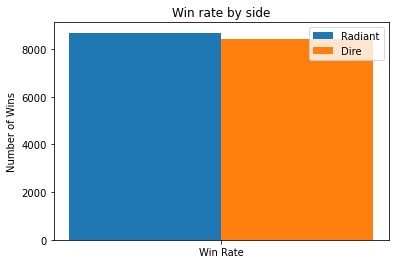

In [9]:
radiant_win,dire_win=y_train["radiant_win"].value_counts()



labels = ['Win Rate']
men_means = [radiant_win]
women_means = [dire_win]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Radiant')
rects2 = ax.bar(x + width/2, women_means, width, label='Dire')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Wins')
ax.set_title('Win rate by side')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()




**Test logistic regression**

In [10]:
logit = LogisticRegression(C=1, solver='lbfgs', max_iter=500,
                           random_state=17, n_jobs=4,
                          multi_class='multinomial')
logit_pipe = Pipeline([('scaler', StandardScaler()),
                       ('logit', logit)])

In [11]:
%%time
logit_pipe.fit(X_train, y_train)
# this may take a while...

Wall time: 3.2 s


Pipeline(steps=[('scaler', StandardScaler()),
                ('logit',
                 LogisticRegression(C=1, max_iter=500,
                                    multi_class='multinomial', n_jobs=4,
                                    random_state=17))])

In [12]:
logit_val_pred = logit_pipe.predict(X_test)
accuracy_score(y_test, logit_val_pred)

0.4973137117495912

In [13]:
first_forest = RandomForestClassifier(
    n_estimators=100, random_state=17, n_jobs=4)

In [14]:
%%time
first_forest.fit(X_train, y_train)
# this may take a while... (17ss)

Wall time: 2.25 s


RandomForestClassifier(n_jobs=4, random_state=17)

In [15]:
forest_val_pred = first_forest.predict(X_test)
accuracy_score(y_test, forest_val_pred)

0.5052557813594954

In [16]:
pd.DataFrame(first_forest.feature_importances_,
             index=X_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
radiant2_hero_id,0.101562
radiant5_hero_id,0.101125
dire2_hero_id,0.101113
dire1_hero_id,0.101100
dire3_hero_id,0.100680
radiant3_hero_id,0.100051
dire4_hero_id,0.099588
radiant1_hero_id,0.098566
dire5_hero_id,0.098353
radiant4_hero_id,0.097862


In [17]:
lgb_clf = LGBMClassifier(random_state=17)

In [18]:
%%time
lgb_clf.fit(X_train, y_train)

Wall time: 166 ms


LGBMClassifier(random_state=17)

In [19]:
accuracy_score(y_test, lgb_clf.predict(X_test))

0.5122634898388227

**1 stage of hyper-param tuning: tuning model complexity**

In [20]:
param_grid = {'num_leaves': [7, 15, 31, 63],
              'max_depth': [3, 4, 5, 6, -1]}

In [21]:
grid_searcher = GridSearchCV(estimator=lgb_clf, param_grid=param_grid,
                             cv=5, verbose=1, n_jobs=4)

In [22]:
grid_searcher.fit(X_train, y_train) # This may take a while!

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.6s finished


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=17), n_jobs=4,
             param_grid={'max_depth': [3, 4, 5, 6, -1],
                         'num_leaves': [7, 15, 31, 63]},
             verbose=1)

In [23]:
grid_searcher.best_params_, grid_searcher.best_score_

({'max_depth': 5, 'num_leaves': 15}, 0.5110094651749778)

In [24]:
accuracy_score(y_test, grid_searcher.predict(X_test))

0.5190376080355057

**2 stage of hyper-param tuning: convergence:**

In [25]:
# This may take a while
num_iterations = 200
lgb_clf2 = LGBMClassifier(random_state=17, max_depth=5,
                          num_leaves=15, n_estimators=num_iterations,
                          n_jobs=1)

param_grid2 = {'learning_rate': np.logspace(-3, 0, 10)}
grid_searcher2 = GridSearchCV(estimator=lgb_clf2, param_grid=param_grid2,
                               cv=5, verbose=1, n_jobs=4)
grid_searcher2.fit(X_train, y_train)
print(grid_searcher2.best_params_, grid_searcher2.best_score_)
print(accuracy_score(y_test, grid_searcher2.predict(X_test)))
# This may take very long !!! 6.3 min

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'learning_rate': 0.046415888336127774} 0.5101333992768946
0.5220742817098809


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   10.5s finished


In [26]:
final_lgb = LGBMClassifier(n_estimators=200, num_leaves=15,
                           learning_rate=0.05, max_depth=5,
                         n_jobs=4)


In [27]:
%%time
final_lgb.fit(X_train, y_train)
# This may take some time

Wall time: 260 ms


LGBMClassifier(learning_rate=0.05, max_depth=5, n_estimators=200, n_jobs=4,
               num_leaves=15)

In [28]:
%%time
lgb_final_pred = final_lgb.predict(X_test)

Wall time: 39.9 ms


In [29]:
print(accuracy_score(y_test, lgb_final_pred))

0.5202055594487269
